### Artificial Neural Network

Part 1 - Data Preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
cd Dataset

/Users/apple/Desktop/AI/DL/Krish/DL/First ANN (Bank Customer loyalit)/Dataset


In [7]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [10]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
#Create dummy variables
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)

In [13]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [14]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [15]:
# Concatenate the Data Frames
X = pd.concat([X,geography,gender],axis=1)

In [16]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [17]:
# Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [18]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [21]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,0,0,0
2899,586,35,7,0.00,2,1,0,70760.69,0,0,0
9549,578,36,1,157267.95,2,1,0,141533.19,0,1,1
2740,650,34,4,142393.11,1,1,1,11276.48,1,0,1


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

Part 2 - Now let's make the ANN!

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,PReLU,LeakyReLU,ELU

In [38]:
# Initialising the ANN

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)


Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5617 - accuracy: 0.7190 - val_loss: 0.5170 - val_accuracy: 0.7683
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4957 - accuracy: 0.7819 - val_loss: 0.4895 - val_accuracy: 0.7921
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4736 - accuracy: 0.7940 - val_loss: 0.4759 - val_accuracy: 0.7952
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4617 - accuracy: 0.7959 - val_loss: 0.4673 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4538 - accuracy: 0.7962 - val_loss: 0.4612 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4481 - accuracy: 0.7962 - val_loss: 0.4571 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4437 - accuracy: 0.7962 - val_loss: 0.4538 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3694 - accuracy: 0.8444 - val_loss: 0.3893 - val_accuracy: 0.8289
Epoch 59/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3686 - accuracy: 0.8449 - val_loss: 0.3890 - val_accuracy: 0.8307
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3679 - accuracy: 0.8451 - val_loss: 0.3884 - val_accuracy: 0.8285
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3671 - accuracy: 0.8461 - val_loss: 0.3879 - val_accuracy: 0.8304
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3664 - accuracy: 0.8468 - val_loss: 0.3875 - val_accuracy: 0.8289
Epoch 63/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3658 - accuracy: 0.8470 - val_loss: 0.3870 - val_accuracy: 0.8292
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3651 - accuracy: 0.8487 - val_loss: 0.3866 - val_accuracy:

In [40]:
c

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


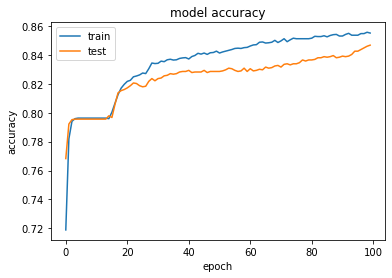

In [45]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

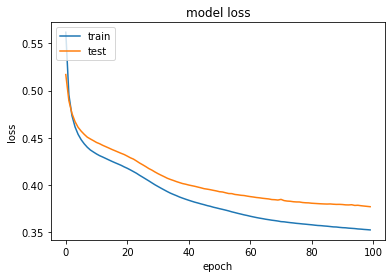

In [43]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [48]:
cm

array([[1521,   74],
       [ 223,  182]])

In [49]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [50]:
score

0.8515